In [1]:
import matplotlib.pyplot as plt
import numpy as np

import  PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [3]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/13979098645_50b9eebc02_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/7055500907_dcf2bb50e0.jpg'),
 PosixPath('datasets/flower_photos/tulips/3524204544_7233737b4f_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/3529889389_ab4cb6c43b.jpg'),
 PosixPath('datasets/flower_photos/tulips/7481217920_6f65766a1c_n.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [8]:
image_count

3670

In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:9]

[PosixPath('datasets/flower_photos/roses/921984328_a60076f070_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2501297526_cbd66a3f7e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/19988406792_68201f76e3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16525204061_9b47be3726_m.jpg'),
 PosixPath('datasets/flower_photos/roses/16476788181_0e2ffc719a.jpg'),
 PosixPath('datasets/flower_photos/roses/3742168238_d961937e68_n.jpg'),
 PosixPath('datasets/flower_photos/roses/326541992_d542103ca8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3264570182_c7ded528ba_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg')]

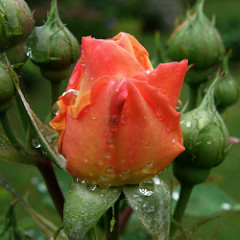

In [10]:
PIL.Image.open(str(roses[1]))

In [11]:
tuples = list(data_dir.glob('tulips/*'))
tuples[:9]

[PosixPath('datasets/flower_photos/tulips/13979098645_50b9eebc02_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/7055500907_dcf2bb50e0.jpg'),
 PosixPath('datasets/flower_photos/tulips/3524204544_7233737b4f_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/3529889389_ab4cb6c43b.jpg'),
 PosixPath('datasets/flower_photos/tulips/7481217920_6f65766a1c_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5674134129_2db5136cba.jpg'),
 PosixPath('datasets/flower_photos/tulips/13539404903_cd113e3e9b.jpg'),
 PosixPath('datasets/flower_photos/tulips/8712267391_c756f18ee7_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2238626027_058c404b94.jpg')]

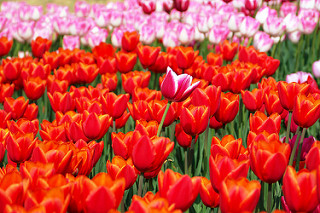

In [12]:
PIL.Image.open(str(tuples[0]))

In [13]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [16]:
img.shape

(240, 223, 3)

In [17]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [18]:
x, y = [], []

In [19]:


for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
x=np.array(x)
y=np.array(y)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=1)

In [23]:
x_train_scaled = x_train/255
x_test_scaled= x_test/255

In [24]:
from tensorflow.keras.models import Sequential
num_classes=5
model = Sequential([
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [25]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.fit(x_train_scaled, y_train, epochs=10)


Epoch 1/10
86/86 [==============================] - 75s 876ms/step - loss: 0.9574 - accuracy: 0.6348
Epoch 2/10
86/86 [==============================] - 76s 889ms/step - loss: 0.7330 - accuracy: 0.7315
Epoch 3/10
86/86 [==============================] - 77s 896ms/step - loss: 0.5419 - accuracy: 0.8041
Epoch 4/10
86/86 [==============================] - 76s 887ms/step - loss: 0.3545 - accuracy: 0.8739
Epoch 5/10
86/86 [==============================] - 79s 923ms/step - loss: 0.2049 - accuracy: 0.9360
Epoch 6/10
86/86 [==============================] - 78s 902ms/step - loss: 0.1189 - accuracy: 0.9669
Epoch 7/10
86/86 [==============================] - 79s 909ms/step - loss: 0.0872 - accuracy: 0.9764
Epoch 8/10
86/86 [==============================] - 78s 908ms/step - loss: 0.0553 - accuracy: 0.9851
Epoch 9/10
86/86 [==============================] - 81s 932ms/step - loss: 0.0394 - accuracy: 0.9909
Epoch 10/10
86/86 [==============================] - 78s 912ms/step - loss: 0.0818 - accura

In [28]:
model.evaluate(x_test_scaled,y_test)


29/29 [==============================] - 9s 290ms/step - loss: 2.0198 - accuracy: 0.6176


[2.019814968109131, 0.6176470518112183]

In [32]:
img_height = 180
img_width = 180

In [33]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [36]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 94s 1s/step - loss: 1.4544 - accuracy: 0.3685
Epoch 2/5
86/86 [==============================] - 92s 1s/step - loss: 1.0750 - accuracy: 0.5658
Epoch 3/5
86/86 [==============================] - 92s 1s/step - loss: 0.9761 - accuracy: 0.6232
Epoch 4/5
86/86 [==============================] - 90s 1s/step - loss: 0.8924 - accuracy: 0.6523
Epoch 5/5
86/86 [==============================] - 92s 1s/step - loss: 0.8157 - accuracy: 0.6900


In [37]:
model.evaluate(x_test_scaled,y_test)


29/29 [==============================] - 9s 290ms/step - loss: 0.8737 - accuracy: 0.6405


[0.8737230896949768, 0.6405228972434998]